In [8]:
from matplotlib import pyplot as plt
import csv
import pickle
import matplotlib
import re
from math import sqrt
import numpy as np
from scipy.optimize import curve_fit
from scipy import interpolate
import sys
import xlrd
sys.path.insert(0, './')
sys.path.insert(0, '../')
from analyze_asiii import *
%matplotlib notebook

In [9]:
# imports calibration curve stuff

num_cols = 12
num_rows = 8

nm_start = 400
nm_step = 10
nm_end = 700
nms = np.arange(nm_start,nm_end + nm_step,nm_step)

blanks = 'Blanks.txt'
adds = 'Add2.txt'

# reads all the data
wells_blanks = read_file(blanks, num_cols, nm_start, nm_end, nm_step)

wells_add = read_file(adds, num_cols, nm_start, nm_end, nm_step)

# subtracts blanks from arsenazo data
for well in wells_add:
    wells_add[well] -= wells_blanks[well]

all_wells_adds.append(wells_add)
    
rees = ['La','Eu','Yb']
la_concs = np.arange(0,40,1.25)

<IPython.core.display.Javascript object>


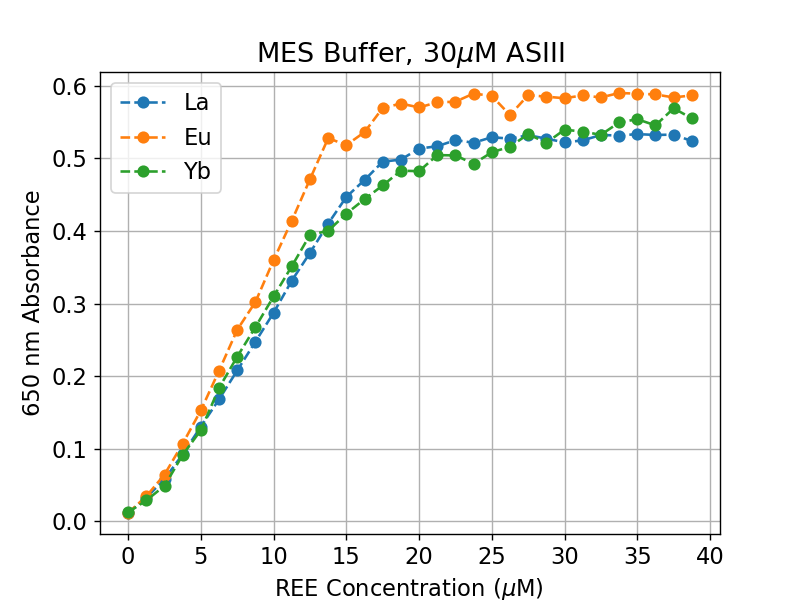

In [10]:
# plots calibratoin curves for all REEs on one graph

la_concs = np.arange(0,40,1.25)
wave = (650 - nm_start) // nm_step
plt.figure()
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.size'] = 13
for j in range(3):
    abses = []
    for i in range(len(la_concs)):
        r = i % 8 + 1
        c= i // 8 + 1
        abses.append(wells_add[(r,c + 4*j)][wave])
    plt.plot(la_concs, abses, 'o--')
plt.legend(['La','Eu','Yb'])
plt.title('MES Buffer, 30$\mu$M ASIII')
plt.xlabel('REE Concentration ($\mu$M) ')
plt.ylabel('650 nm Absorbance')
plt.grid()

<IPython.core.display.Javascript object>


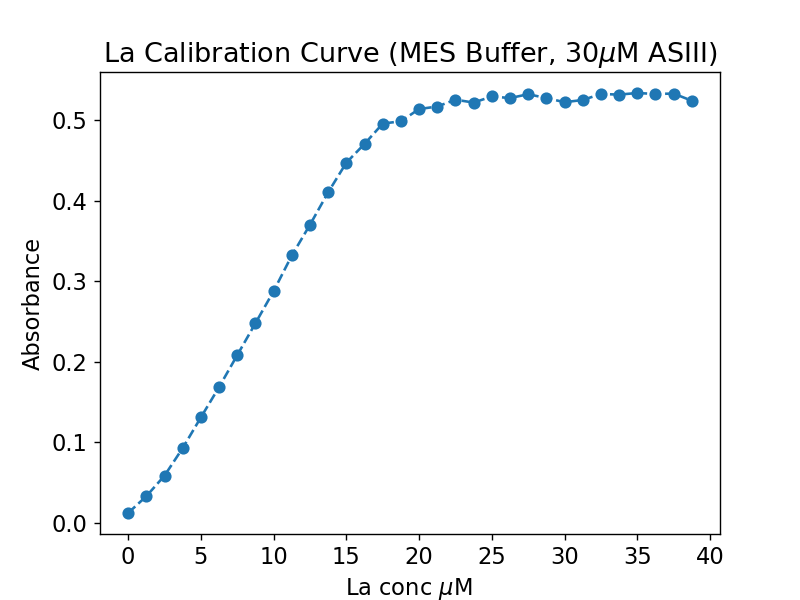

<IPython.core.display.Javascript object>


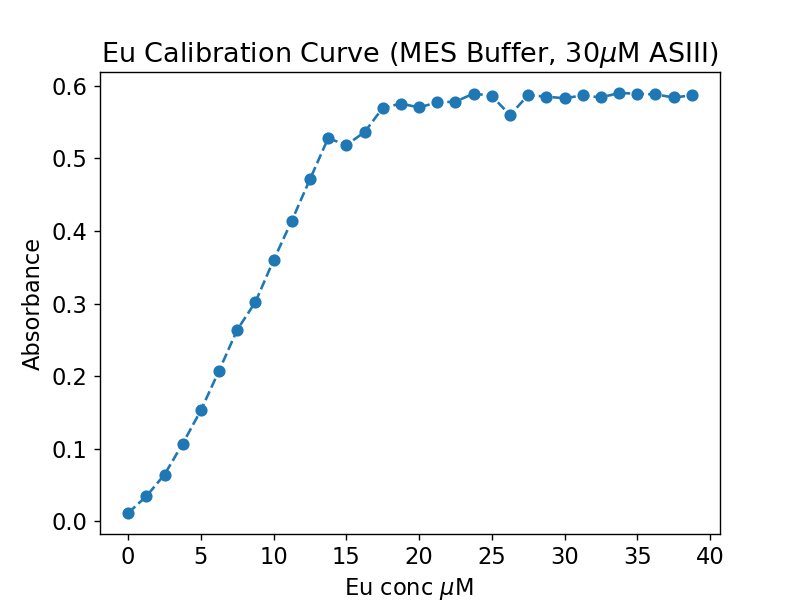

<IPython.core.display.Javascript object>


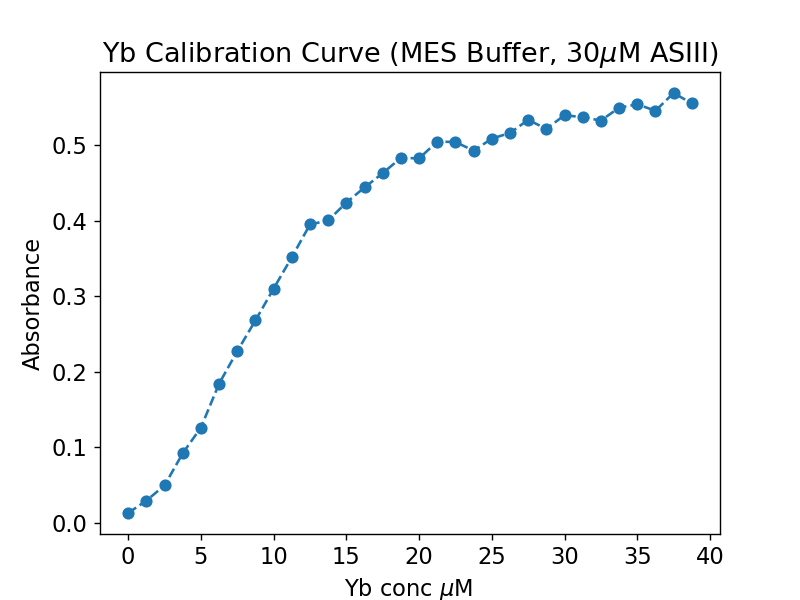

In [11]:
# plots absorbance (mean,std) vs REE for a particular wavelength for all times

la_concs = np.arange(0,40,1.25)
wave = (650 - nm_start) // nm_step
for j in range(3):
    plt.figure()
    abses = []
    for i in range(len(la_concs)):
        r = i % 8 + 1
        c= i // 8 + 1
        abses.append(wells_add[(r,c + 4*j)][wave])
    plt.plot(la_concs, abses, 'o--')
    plt.title(rees[j] + ' Calibration Curve (MES Buffer, 30$\mu$M ASIII)')
    plt.xlabel(rees[j] + ' conc $\mu$M ')
    plt.ylabel('Absorbance')


[6.40000000e-04 3.23386361e-02 2.69441225e-01 1.65000000e+01]


<IPython.core.display.Javascript object>


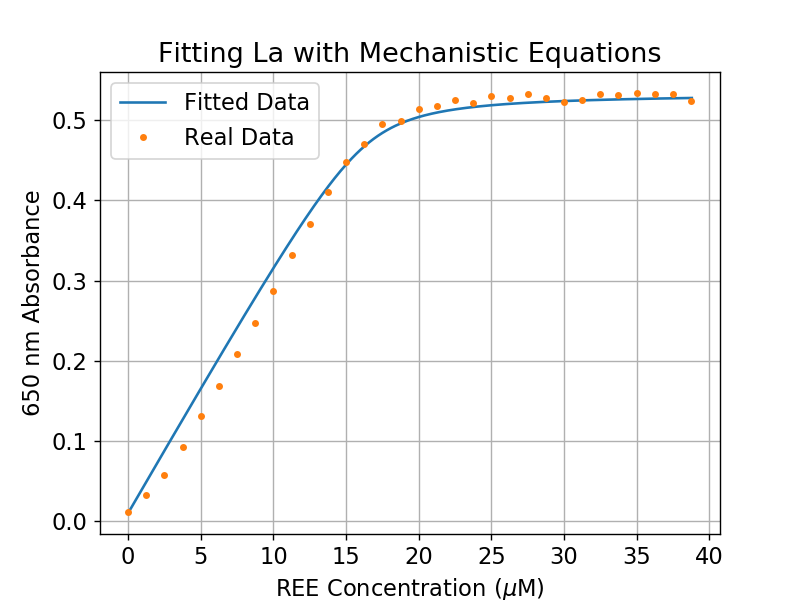

<IPython.core.display.Javascript object>


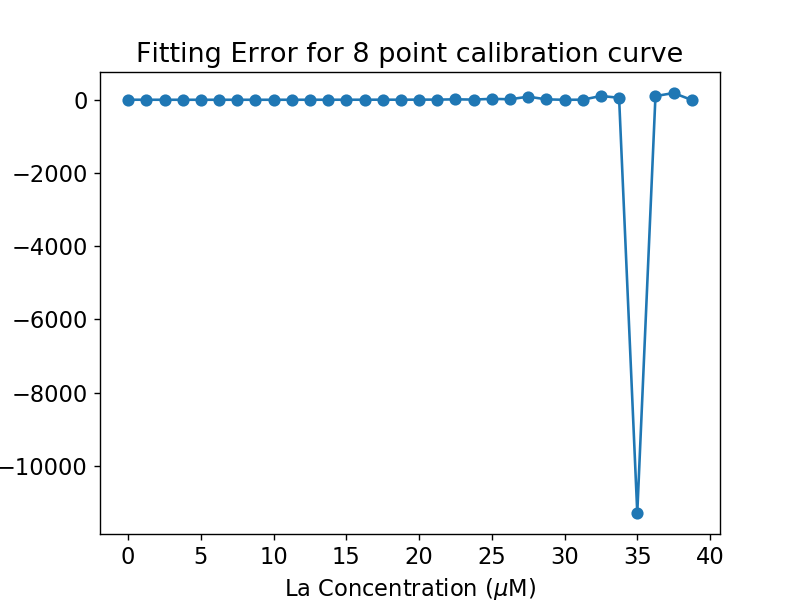

[6.24000000e-04 3.59465663e-02 5.05862458e-02 1.62852504e+01]


<IPython.core.display.Javascript object>


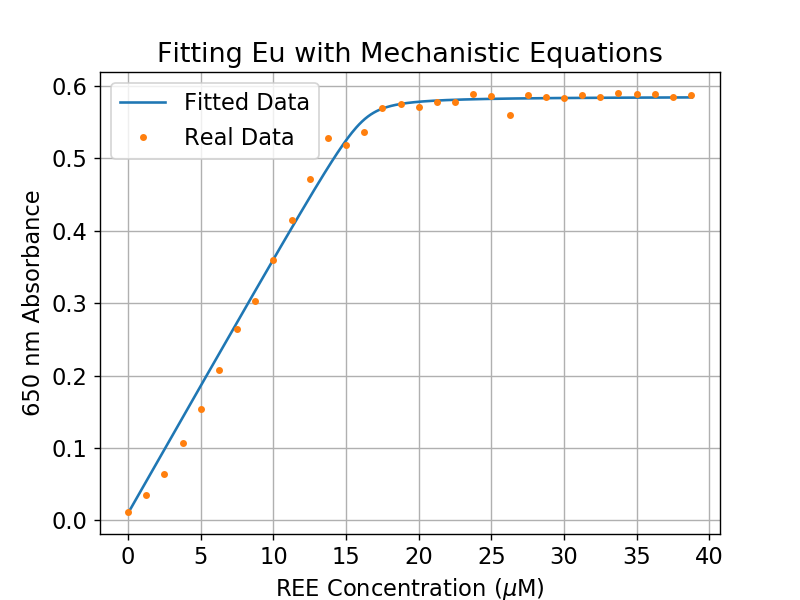

<IPython.core.display.Javascript object>


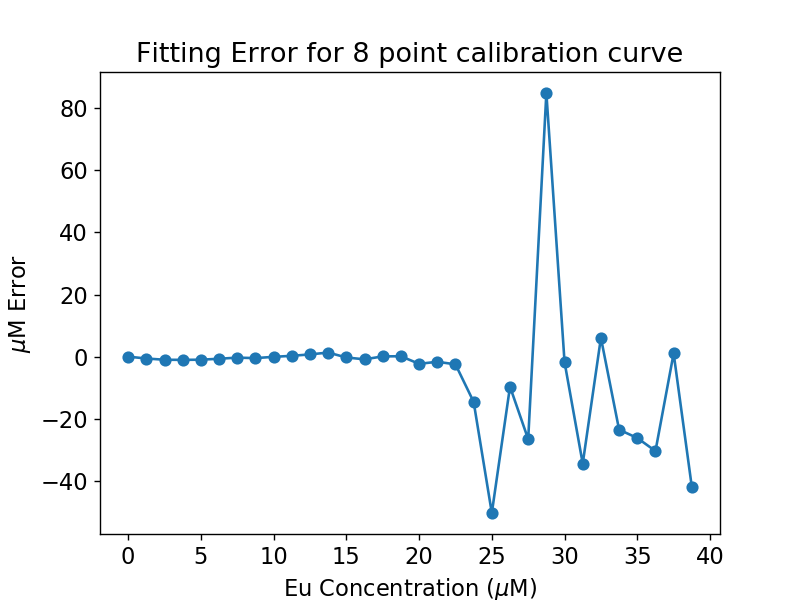

[6.77333333e-04 3.48578365e-02 1.13252022e+00 1.65000000e+01]


<IPython.core.display.Javascript object>


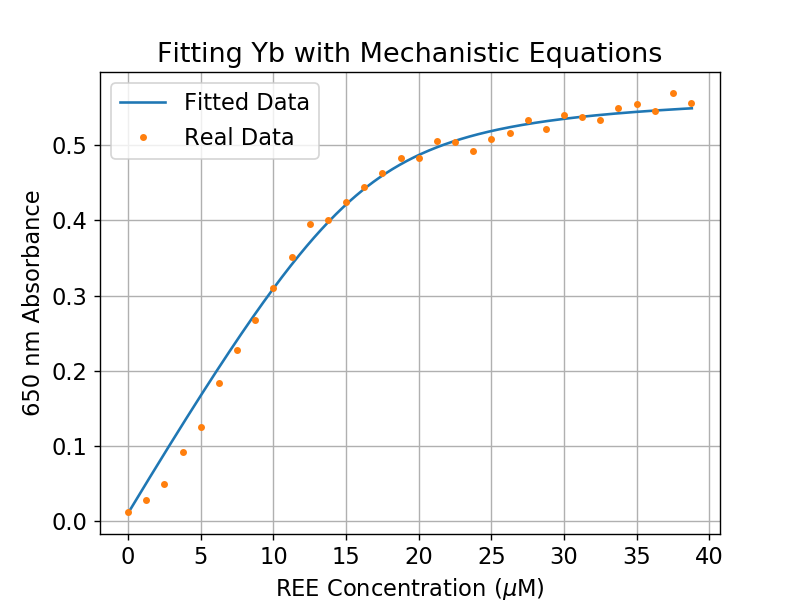

<IPython.core.display.Javascript object>


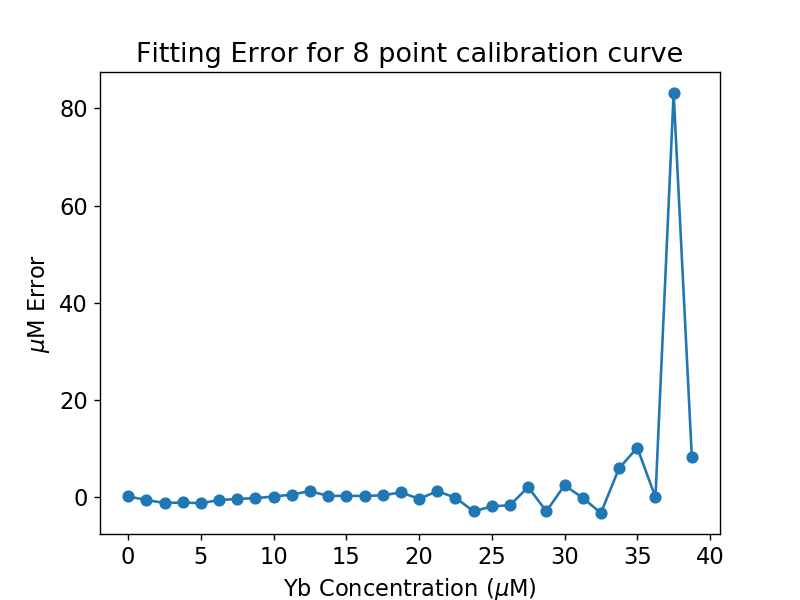

In [12]:
# uses mechanistic equations to fit data (only 650 nm)

# fits using mechanistic equations

# assumes dye concentration is close to correct
lim = 32
for j in range(3):
    abses650 = []
    mean_vals = []
    std_vals = []
    for_fitting = []
    for i in range(len(la_concs[:lim])):
        r = i % 8 + 1
        c= i // 8 + 1
        abses650.append(wells_add[(r,c+j*4)][(650 - nm_start) // nm_step])

    dye_conc = 15
    p0 = get_p0_guess_1(la_concs[:lim], abses650, dye_conc)
    bounds = get_bounds_1(la_concs[:lim], abses650, dye_conc)
    popt,pcov = curve_fit(get_absorbance_1fit, la_concs[:lim], abses650, p0=p0, bounds=bounds)
    print(popt)

    plotting_concs = np.arange(0,38.9,0.1)
    plotting_abses = get_absorbance_1(plotting_concs, popt)

    fitted_vals = get_ree_conc_1(abses650, popt)

    plt.figure()
    plt.rcParams['pdf.fonttype'] = 42
    plt.xlabel('REE Concentration ($\mu$M)')
    plt.ylabel('650 nm Absorbance')
    plt.plot(plotting_concs, plotting_abses)
    plt.plot(la_concs[:lim], abses650, '.')
    plt.legend(['Fitted Data', 'Real Data',]) #'real data used for fitting'])
    plt.title('Fitting ' + rees[j] + ' with Mechanistic Equations')
    plt.grid()

    plt.figure()
    plt.plot(la_concs[:lim], fitted_vals[:lim] - la_concs[:lim], '-o')
    plt.xlabel(rees[j] + ' Concentration ($\mu$M)')
    plt.ylabel('$\mu$M Error')
    plt.title('Fitting Error for 8 point calibration curve')

[6.40000000e-04 2.89075055e-02 4.39678973e-02 1.83182298e+01]


<IPython.core.display.Javascript object>


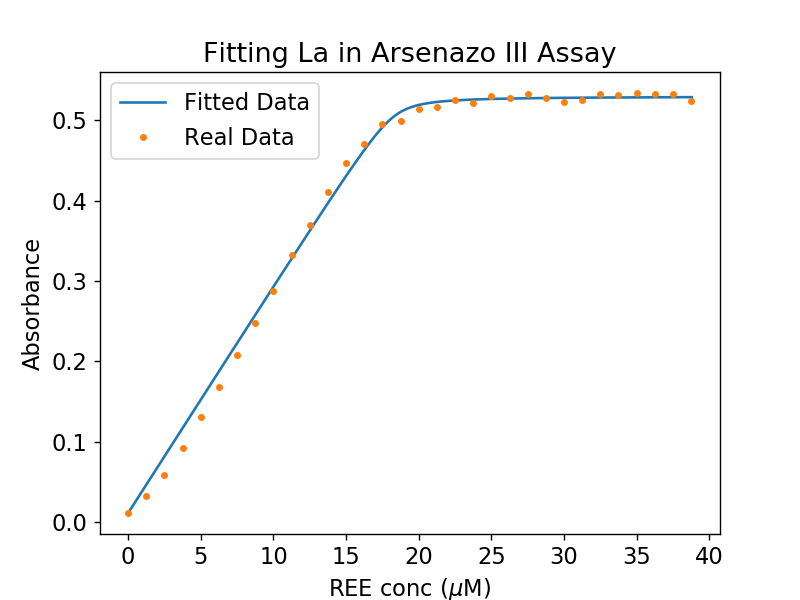

<IPython.core.display.Javascript object>


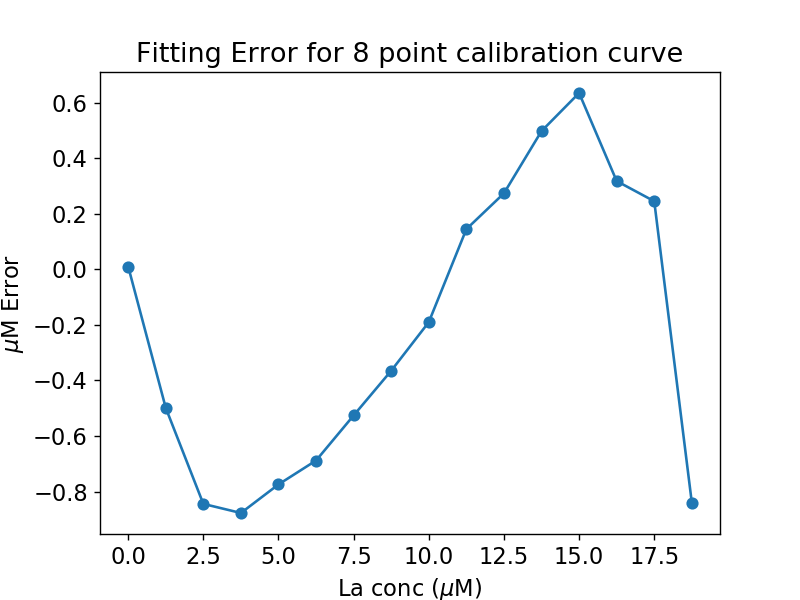

[6.24000000e-04 3.59468083e-02 5.06040732e-02 1.62851736e+01]


<IPython.core.display.Javascript object>


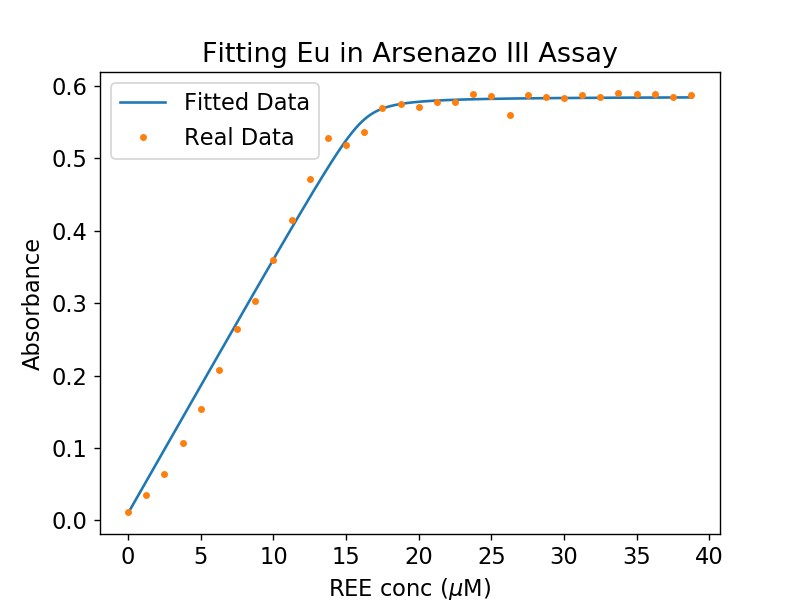

<IPython.core.display.Javascript object>


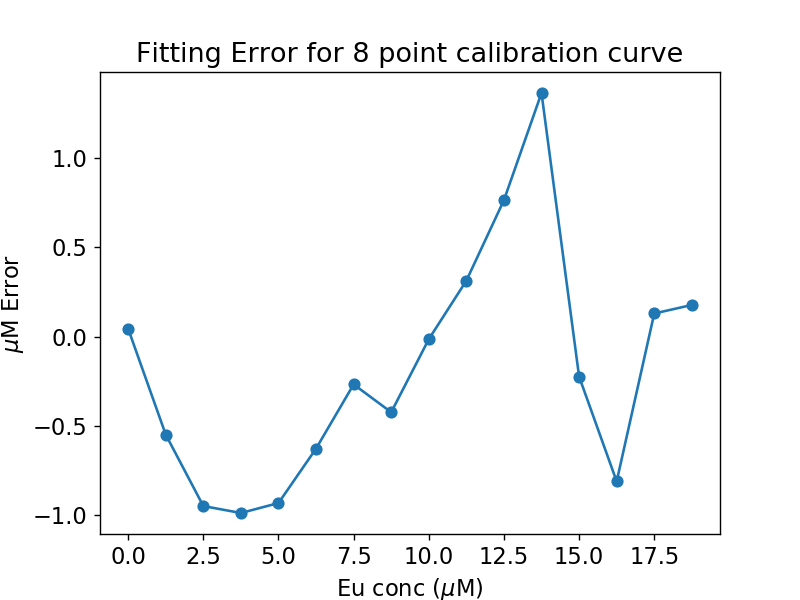

[6.77333333e-04 3.24860410e-02 7.89081460e-01 1.74444167e+01]


<IPython.core.display.Javascript object>


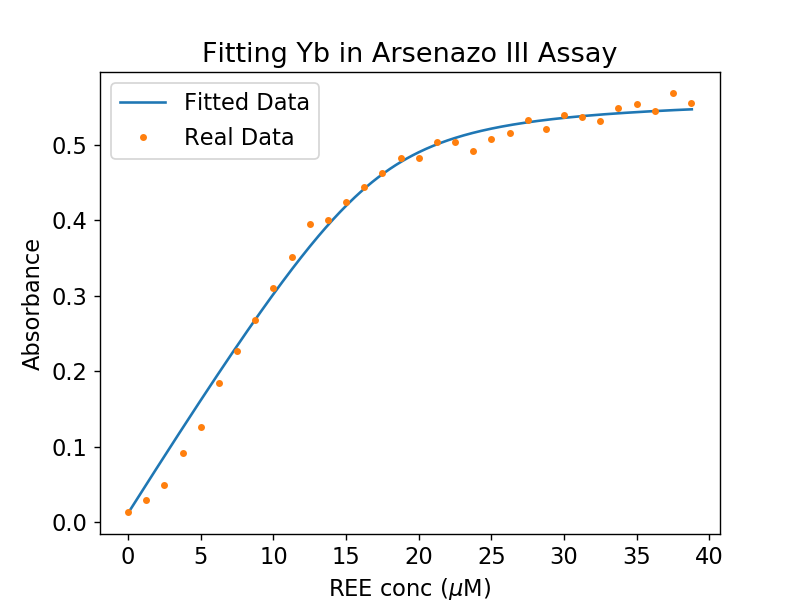

<IPython.core.display.Javascript object>


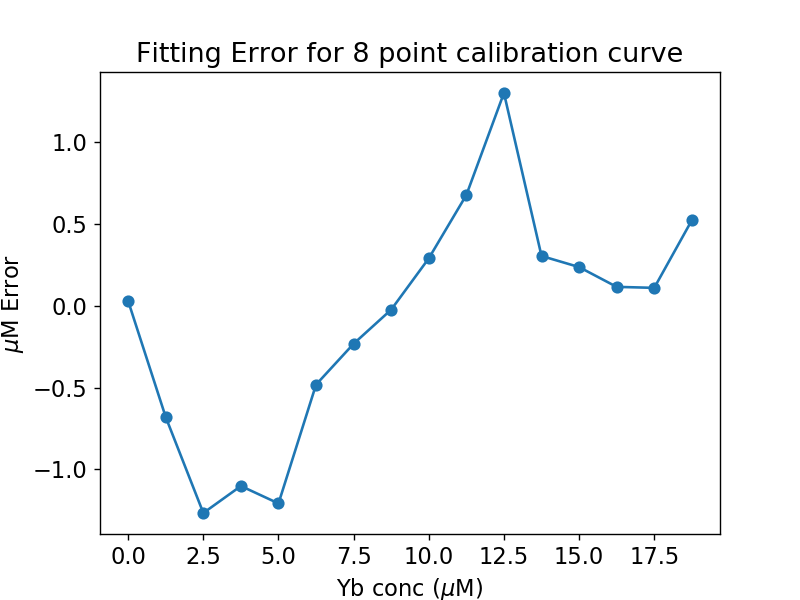

In [13]:
# uses mechanistic equations to fit data (only 650 nm)

# fits using mechanistic equations

# assumes dye concentration can be anything
for j in range(3):
    abses650 = []
    mean_vals = []
    std_vals = []
    for_fitting = []
    for i in range(len(la_concs)):
        r = i % 8 + 1
        c= i // 8 + 1
        abses650.append(wells_add[(r,c+j*4)][(650 - nm_start) // nm_step])

    dye_conc = 15
    p0 = get_p0_guess_1(la_concs, abses650, dye_conc)
    bounds = get_bounds_1(la_concs, abses650, dye_conc)
    bounds = ((bounds[0][0], bounds[0][1], bounds[0][2], 0), (bounds[1][0], bounds[1][1], bounds[1][2], 100))
    popt,pcov = curve_fit(get_absorbance_1fit, la_concs, abses650, p0=p0, bounds=bounds)
    print(popt)

    plotting_concs = np.arange(0,38.9,0.1)
    plotting_abses = get_absorbance_1(plotting_concs, popt)

    fitted_vals = get_ree_conc_1(abses650, popt)

    plt.figure()

    plt.xlabel('REE conc ($\mu$M)')
    plt.ylabel('Absorbance')
    plt.plot(plotting_concs, plotting_abses)
    plt.plot(la_concs, abses650, '.')
    plt.legend(['Fitted Data', 'Real Data',]) #'real data used for fitting'])
    plt.title('Fitting ' + rees[j] + ' in Arsenazo III Assay')

    plt.figure()
    plt.plot(la_concs[:16], fitted_vals[:16] - la_concs[:16], '-o')
    plt.xlabel(rees[j] + ' conc ($\mu$M)')
    plt.ylabel('$\mu$M Error')
    plt.title('Fitting Error for 8 point calibration curve')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1.25, 2.45, 3.8000000000000003, 5.1000000000000005, 6.300000000000001, 7.5, 8.700000000000001, 9.850000000000001, 11.200000000000001, 12.4, 13.75, 15.200000000000001, 16.3, 17.900000000000002, 18.150000000000002]


<IPython.core.display.Javascript object>


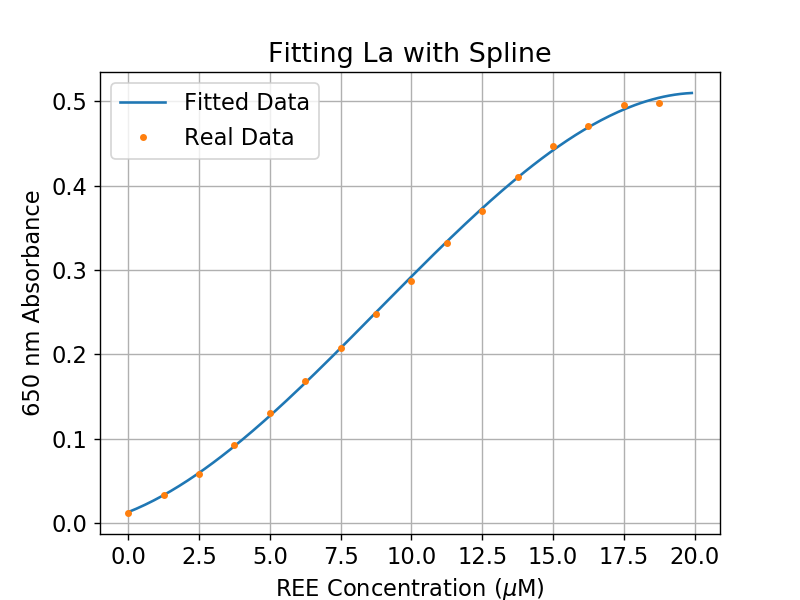

<IPython.core.display.Javascript object>


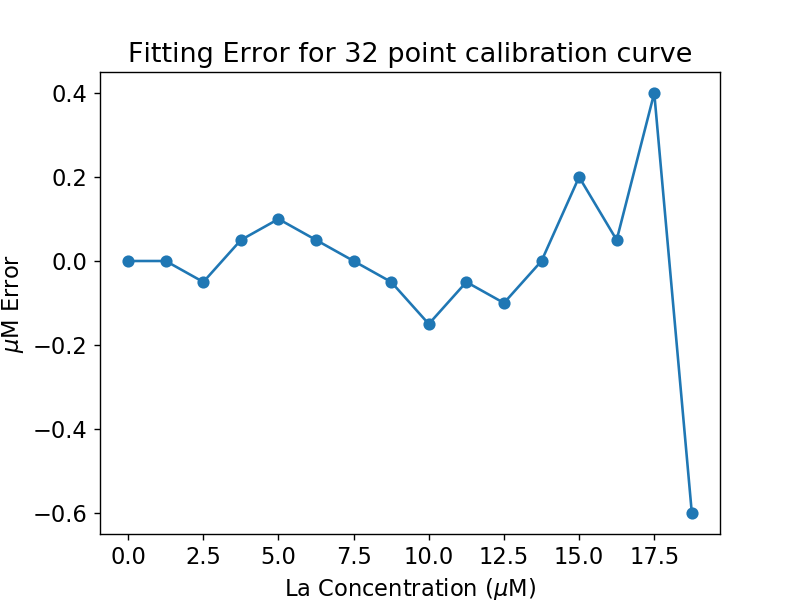

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.1, 1.3, 2.4000000000000004, 3.75, 4.95, 6.300000000000001, 7.65, 8.5, 9.9, 11.200000000000001, 12.8, 14.75, 14.350000000000001, 15.100000000000001, 17.95, 18.05]


<IPython.core.display.Javascript object>


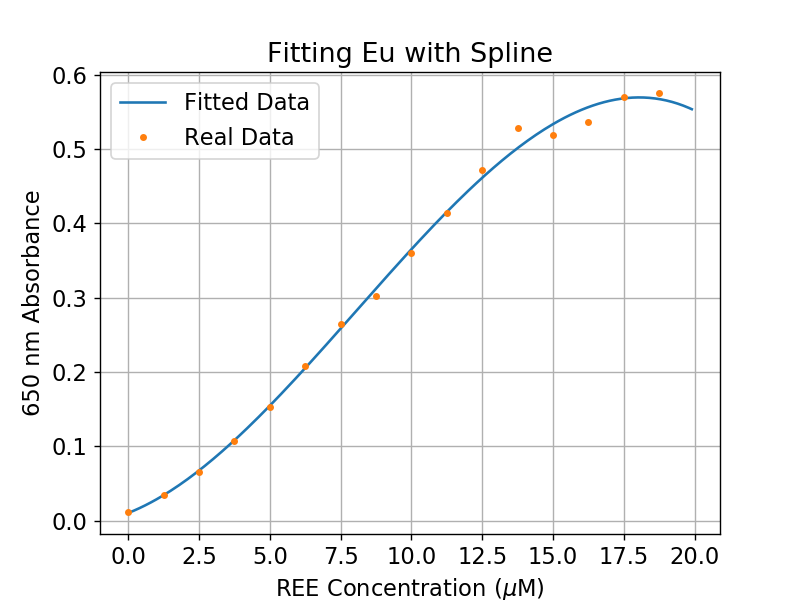

<IPython.core.display.Javascript object>


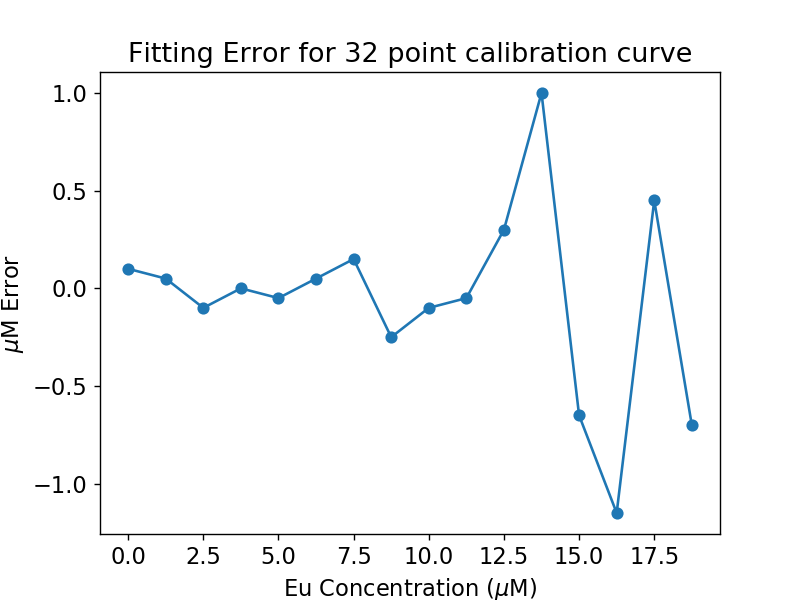

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.5, 1.25, 2.0500000000000003, 3.5500000000000003, 4.65, 6.4, 7.65, 8.9, 10.15, 11.5, 13.100000000000001, 13.3, 14.350000000000001, 15.450000000000001, 19.900000000000002, 18.45]


C:\Users\seanm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


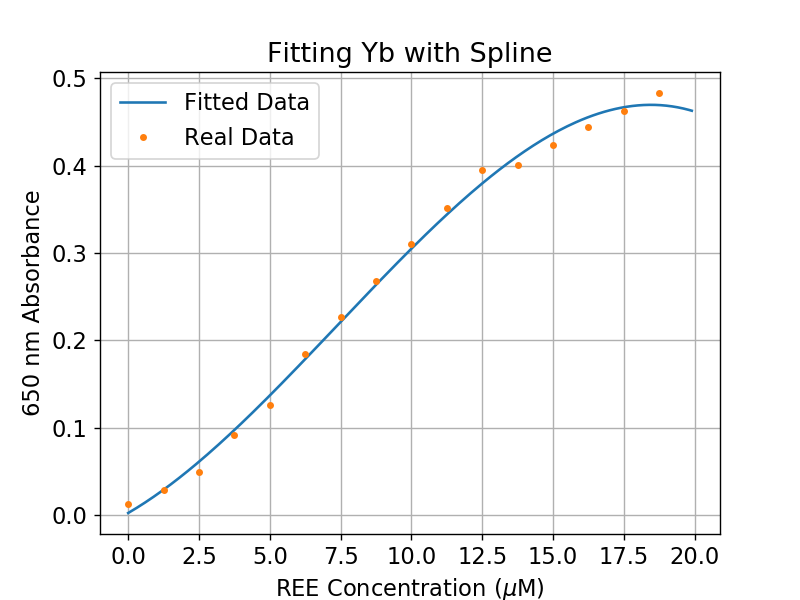

<IPython.core.display.Javascript object>


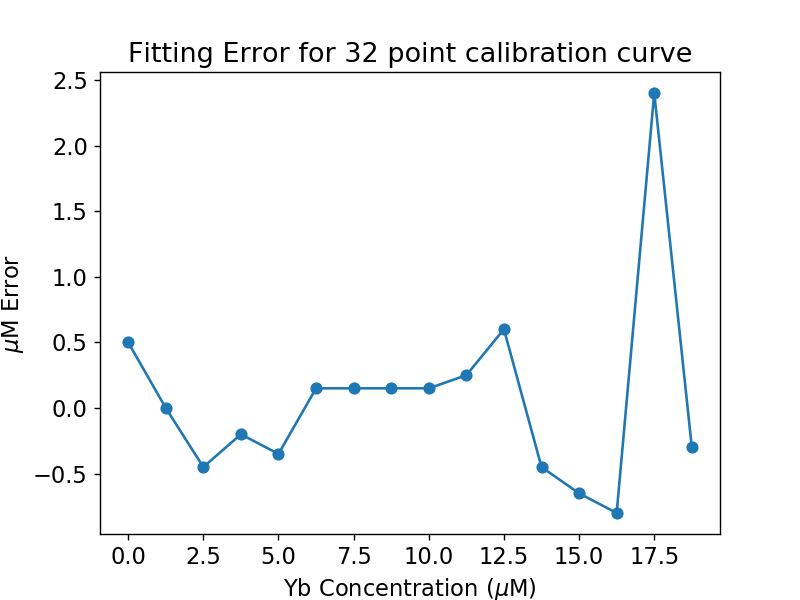

In [14]:
# use splines to fit REE data (only 650 nm)

# fits using interpolation
lim = 16
conc_lim = lim / 32 * 40
for j in range(3):
    abses = []
    abses650 = []
    all_concs = []
    for_fitting = []

    for i in range(len(la_concs[:lim])):
        r = i % 8 + 1
        c= i // 8 + 1
        vals = []
        vals.append(wells_add[(r,c + 4*j)][(650 - nm_start) // nm_step])
        if la_concs[i] in [0,2.5,5,10,15,20,30,38.75] or True:
            all_concs.append(la_concs[i])
            abses.append(wells_add[(r,c + 4*j)])
            abses650.append(wells_add[(r,c+4*j)][(650 - nm_start) // nm_step])
        if la_concs[i] in [0,2.5,5,10,15,20,30,38.75] or True:
            for_fitting.append(i)
    print(for_fitting)

    splines,weights = get_spline_n(all_concs, abses, np.array([(650 - nm_start) // nm_step]), grain=400)
    maps = get_spline_n_map(splines, 0, conc_lim, 0.05)

    plotting_concs = np.arange(0,conc_lim,0.1)
    plotting_abses = []
    for i in range(len(plotting_concs)):
        plotting_abses.append(splines[0](plotting_concs[i]))

    fitted_vals = []
    for i in range(len(abses650)):
        fitted_vals.append(get_ree_from_spline_n_fast(splines, weights, [abses650[i]], 0, conc_lim, 0.05, maps))
    print(fitted_vals)
    to_plot_mean = []
    to_plot_fitted = []
    for i in range(len(for_fitting)):
        to_plot_mean.append(abses650[for_fitting[i]])
        to_plot_fitted.append(fitted_vals[for_fitting[i]])

    plt.figure()
    plt.rcParams['pdf.fonttype'] = 42
    plt.xlabel('REE Concentration ($\mu$M)')
    plt.ylabel('650 nm Absorbance')
    plt.plot(plotting_concs, plotting_abses)
    plt.plot(la_concs[:lim], abses650, '.')

    plt.legend(['Fitted Data', 'Real Data'])
    plt.title('Fitting ' + rees[j] + ' with Spline')
    plt.grid()

    plt.figure()
    plt.plot(la_concs[:lim], fitted_vals - la_concs[:lim], '-o')
    plt.xlabel(rees[j] + ' Concentration ($\mu$M)')
    plt.ylabel('$\mu$M Error')
    plt.title('Fitting Error for 32 point calibration curve')